In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
files.upload()

Saving car_age_price.csv to car_age_price (1).csv


{'car_age_price.csv': b'Year,Price\r2018,465000\r2019,755000\r2019,700000\r2018,465000\r2018,465000\r2015,350000\r2016,425000\r2017,575000\r2017,509999\r2017,575000\r2019,500000\r2018,500000\r2017,500000\r2019,600000\r2017,475000\r2017,500000\r2017,500000\r2017,550000\r2019,500000\r2017,500000\r2018,500000\r2019,500000\r2015,434999\r2017,550000\r2017,550000\r2017,550000\r2017,550000\r2017,550000\r2017,550000\r2017,550000\r2019,650000\r2017,550000\r2017,550000\r2017,550000\r2017,450000\r2017,550000\r2017,550000\r2017,486000\r2018,475000\r2020,545000\r2019,525000\r2019,600000\r2018,550000\r2019,550000\r2019,550000\r2018,450000\r2019,500000\r2018,450000\r2016,396000\r2018,600000\r2013,325000\r2018,550000\r2013,345000\r2013,345000\r2017,525000\r2017,550000\r2014,341000\r2017,550000\r2014,450000\r2016,550000\r2015,490000\r2017,540000\r2017,540000\r2017,595000\r2015,490000\r2017,495000\r2017,525000\r2015,400000\r2015,465000\r2015,300000\r2015,450000\r2017,490000\r2015,300000\r2013,320000\r20

In [3]:
car=pd.read_csv('car_age_price.csv')
car.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
car.isna().sum()

Year     0
Price    0
dtype: int64

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [6]:
car.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


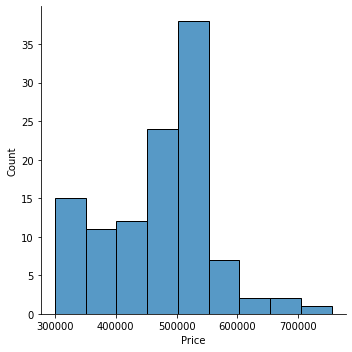

In [7]:
sns.displot(car['Price'])
plt.show()

In [8]:
car.dtypes

Year     int64
Price    int64
dtype: object

In [9]:
cor=car.corr()

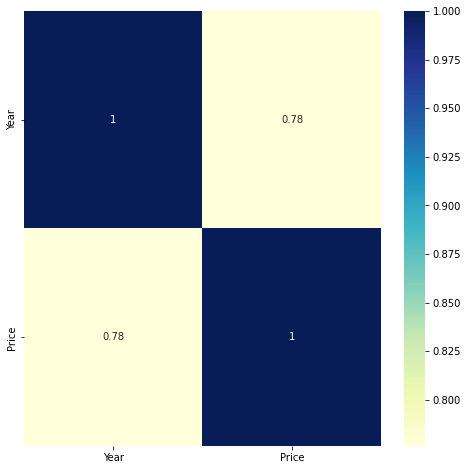

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(cor, cmap="YlGnBu",annot=True)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
y=car['Price']
X=car.drop('Price',axis=1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.25,
                                                   random_state=42)

In [14]:
# creating a linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model1=lr.fit(X_train, y_train)
prediction1 = model1.predict(X_test)

In [15]:
from sklearn.metrics import r2_score, mean_squared_error

In [16]:
print("R Squared value",r2_score(y_test,prediction1))

R Squared value 0.4347961632108023


In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
min_max=MinMaxScaler(feature_range=(0,1))
X=min_max.fit_transform(X)

In [19]:
type(X)

numpy.ndarray

In [20]:
car.columns

Index(['Year', 'Price'], dtype='object')

In [21]:
X=pd.DataFrame(X,columns=['Price'])
X

,Price
0,0.714286
1,0.857143
2,0.857143
3,0.714286
4,0.714286
...,...
107,0.428571
108,0.142857
109,0.285714
110,0.428571


In [22]:
type(X)

pandas.core.frame.DataFrame

In [23]:
X.describe()

,Price
count,112.000000
mean,0.524235
std,0.232802
min,0.000000
25%,0.285714
50%,0.571429
75%,0.571429
max,1.000000


In [24]:
y=car['Price']
X=car.drop('Price',axis=1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.25,
                                                   random_state=42)

In [26]:
lr = LinearRegression()
model2=lr.fit(X_train, y_train)
prediction2 = model2.predict(X_test)

In [27]:
print("R Squared value",r2_score(y_test,prediction2))

R Squared value 0.4347961632108023


In [27]:
## lasso regression

In [28]:
from sklearn.linear_model import Lasso

In [29]:
lasso=Lasso(alpha=1.0)
model3=lasso.fit(X_train, y_train)
prediction3=model3.predict(X_test)

In [30]:
print("R Squared value",r2_score(y_test,prediction3))

R Squared value 0.4348007175862566
